# Kntu AI Final project 4021

### Import the nessecarry libraries

In [296]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

### Preprocessing the data

In [276]:
df = pd.read_csv("dataset.csv")
df.head()

,comment,sentiment
0,"Oh my god, it just doesn't get any worse than ...",negative
1,If you're a layman interested in quantum theor...,negative
2,It's amazing that this no talent actor Chapa g...,negative
3,This must be one of the most overrated Spanish...,negative
4,Some critics have compared Chop Shop with the ...,positive


The data is balanced so we can continue our journey

In [277]:
df.describe()

,comment,sentiment
count,45000,45000
unique,44664,2
top,"Hilarious, clean, light-hearted, and quote-wor...",positive
freq,4,22501


We one hot encode the sentiment column science it is categorical

In [278]:
stopwords = ['.', ',', ';', '"', '\'', '\n', '\r', 'br', '!', '?', '`', '<', '>', '/']

Download the nltk stop works to omitt them from the text

In [279]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mehrab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [280]:
stopwords.extend(nltk.corpus.stopwords.words('english'))
stopwords[:5]

['.', ',', ';', '"', "'"]

In [281]:
stemmer = PorterStemmer()
def preprocess_comment(comment):
    for index, data in df.iterrows():
        comment_tokenized = word_tokenize(comment)
        comment_tokenized_filterd = [w for w in comment_tokenized if w not in stopwords]
        comment_tokenized_filterd_stemmed = [stemmer.stem(w) for w in comment_tokenized_filterd]
        return ' '.join(comment_tokenized_filterd_stemmed)

In [282]:
df['comment_tokenized_filterd_stemmed'] = df['comment'].apply(preprocess_comment)
df.drop('comment', axis=1, inplace=True)
df.head()

,sentiment,comment_tokenized_filterd_stemmed
0,negative,oh god n't get wors i alway love silli littl s...
1,negative,if 're layman interest quantum theori string t...
2,negative,it 's amaz talent actor chapa got well known s...
3,negative,thi must one overr spanish film histori it lac...
4,positive,some critic compar chop shop theatric releas c...


In [283]:
vectorizer = CountVectorizer()
vectorizer.fit(df['comment_tokenized_filterd_stemmed'])

CountVectorizer()

In [284]:
X = vectorizer.transform(df['comment_tokenized_filterd_stemmed'])

In [285]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['sentiment'])
y

array([0, 0, 0, ..., 1, 0, 0])

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

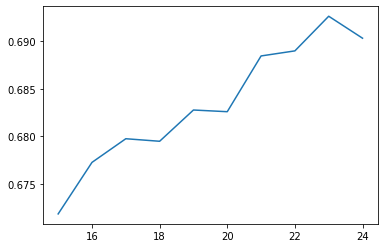

In [297]:
accuracy_scores = []
knns = []
y_preds=[]
for neighbours_count in range(15,25):
    knn = KNeighborsClassifier(n_neighbors=neighbours_count)
    knns.append(knn)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    y_preds.append(y_pred)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
plt.plot(list(range(15,25)), accuracy_scores)

In [298]:
best_index = accuracy_scores.index(max(accuracy_scores))
accuracy_scores[best_index]

0.6926222222222223

In [299]:
def analysis(labels, predictions):
    print("Classification Report: \n", classification_report(labels, predictions, target_names=['positive', 'negative']))
    print("Confusion Matrix: \n", confusion_matrix(labels, predictions))
    print("Accuracy: ", accuracy_score(labels, predictions))

In [300]:
analysis(y_test, y_preds[best_index])

Classification Report: 
               precision    recall  f1-score   support

    positive       0.70      0.67      0.69      5603
    negative       0.69      0.71      0.70      5647

    accuracy                           0.69     11250
   macro avg       0.69      0.69      0.69     11250
weighted avg       0.69      0.69      0.69     11250

Confusion Matrix: 
 [[3779 1824]
 [1634 4013]]
Accuracy:  0.6926222222222223
